# GRUP 07:

Nama Anggota KLP:


1.   Muhammad Wildan An-Naufal 11124478
2.   Vemas Setya Ramadhika 11124355    
3.   Mughli Rasya Alkatiry 10124755
4.   MH DZIKRAN SAPUTRA 10124724
5.   Callista Tetanea Saipul 10124265





# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memasukkan library yang akan kamu gunakan

In [37]:
import pandas as pd
import numpy as np
!pip install pyspan
import pyspan as ps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mengambil file .csv dari Google Drive kamu.

In [25]:
df = pd.read_csv('/content/drive/MyDrive/FIKTI LEARNING/housing_data.csv')

In [29]:
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


Melihat Jumlah Row dan Column

In [28]:
df.shape

(174, 6)

Melakukan Pengecekan tipe data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [42]:
df = pd.read_csv('/content/drive/MyDrive/FIKTI LEARNING/housing_data.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Mencari data duplikat

In [30]:
df.duplicated().sum()

np.int64(0)

Mencari data yang hilang

In [44]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [45]:
binary_cols = ['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'basement', 'prefarea']

for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

In [46]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("\nKolom 'furnishingstatus' sudah di-one-hot encoded.")


Kolom 'furnishingstatus' sudah di-one-hot encoded.


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

Visualisasi menggunakan Histplot

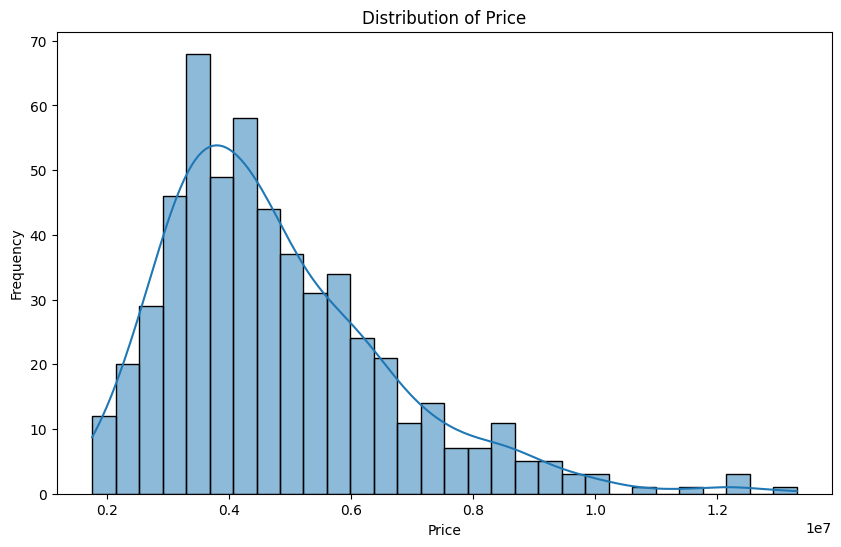

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Visualisasi menggunakan Boxplot

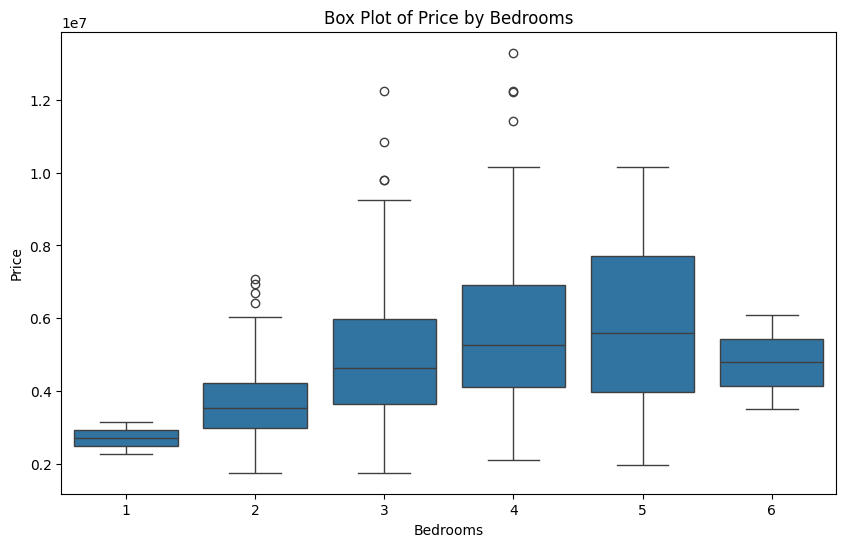

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Box Plot of Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

## Data Preparation

Memisahkan data training dan testing

In [53]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/FIKTI LEARNING/housing_data.csv')

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (436, 12) (436,)
Testing set size: (109, 12) (109,)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

Jelajahi kumpulan datasetnya

In [56]:
df = pd.read_csv('/content/drive/MyDrive/FIKTI LEARNING/housing_data.csv')

In [59]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

In [62]:
df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished': 1,
    'semi-furnished': 0.5,
    'unfurnished': 0
})

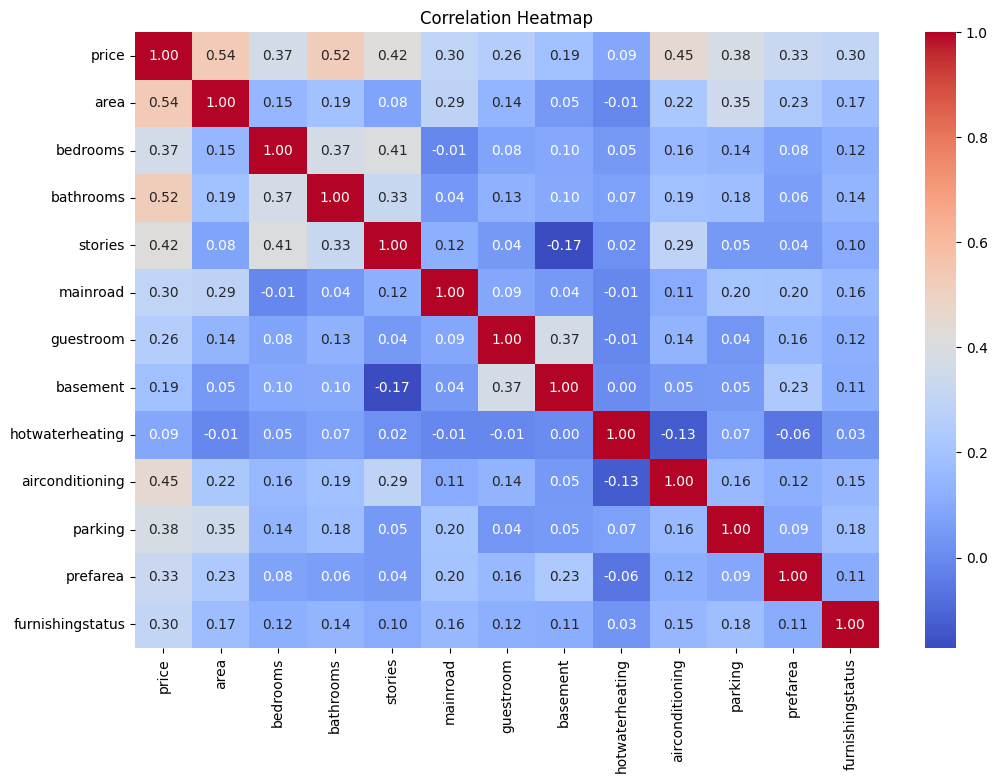

In [63]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Mendefinisikan Feature dan variable

In [64]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories']]  # Select relevant features
y = df['price']  # Target variable

Membagi data menjadi training dan testing sets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Membuat linear regression model

In [66]:
model = LinearRegression()

Memasukkan Model ke data training

In [67]:
model.fit(X_train, y_train)

LinearRegression()

Membuat prediksi pada test set

In [72]:
y_pred = model.predict(X_test)

Mengevaluasi model

In [73]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [74]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2457741642022.087
R-squared: 0.513758534903707


Visualisai Nyata dan Harga Prediksi

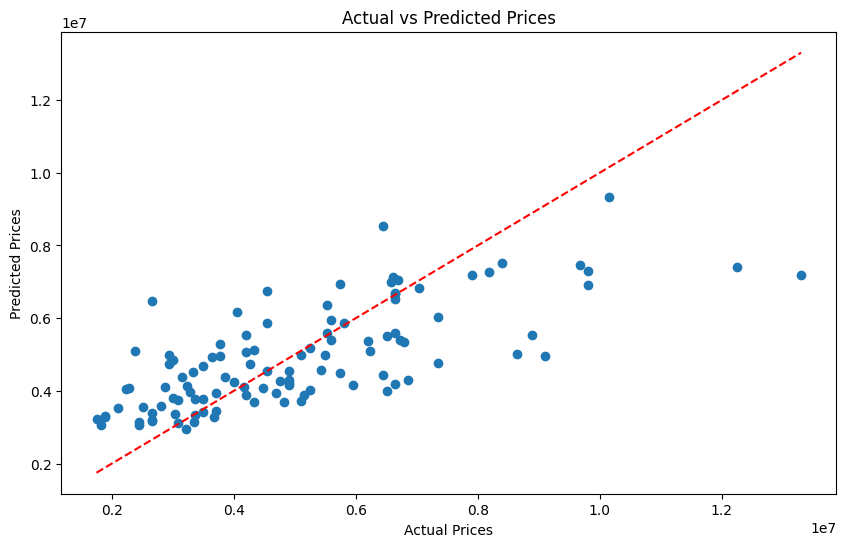

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [76]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [77]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 2457741642022.09
Root Mean Squared Error: 1567718.61
R-squared: 0.51


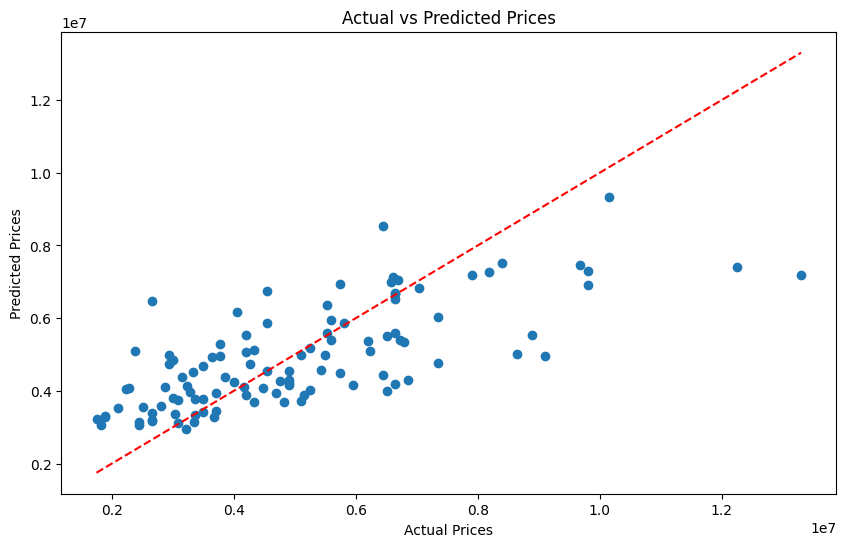

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

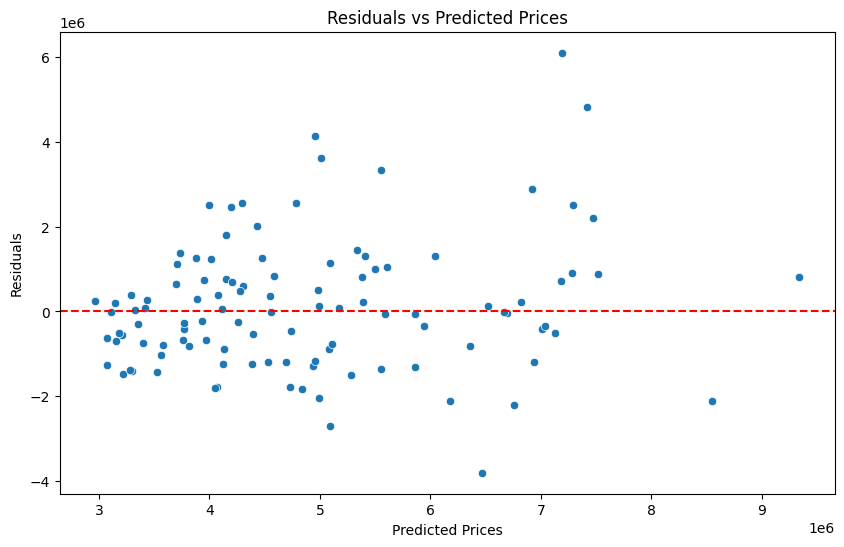

In [79]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()